In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Enable inline charts (important!)
%matplotlib inline


In [3]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv.zip")

# Show the first 5 rows of the data
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Rows and columns
print("Shape of the dataset:", df.shape)

# Data types and missing values
df.info()


Shape of the dataset: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df['Gender'].value_counts()


Gender
Female    112
Male       88
Name: count, dtype: int64

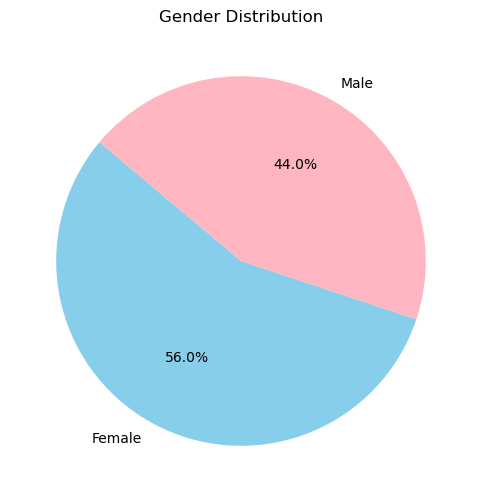

In [9]:
# Pie chart of gender
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightpink'])
plt.title("Gender Distribution")
plt.show()


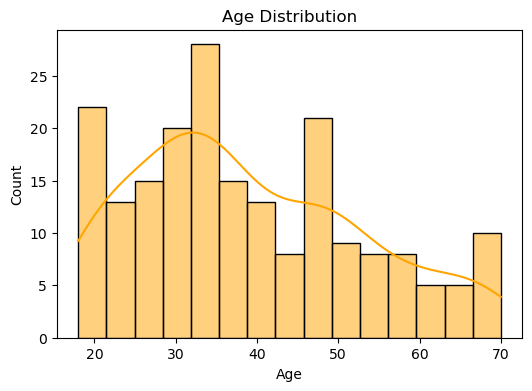

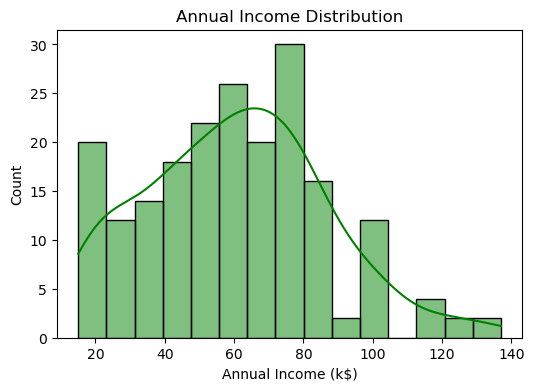

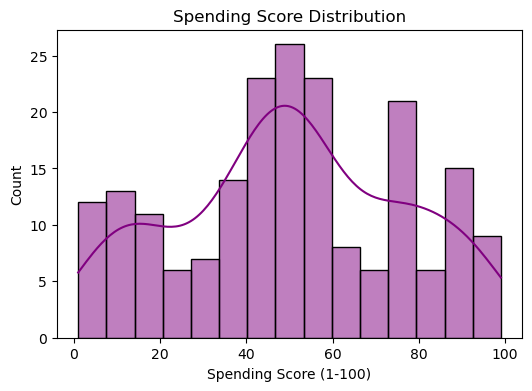

In [10]:
# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=15, color='orange')
plt.title('Age Distribution')
plt.show()

# Histogram of Annual Income
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], kde=True, bins=15, color='green')
plt.title('Annual Income Distribution')
plt.show()

# Histogram of Spending Score
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15, color='purple')
plt.title('Spending Score Distribution')
plt.show()


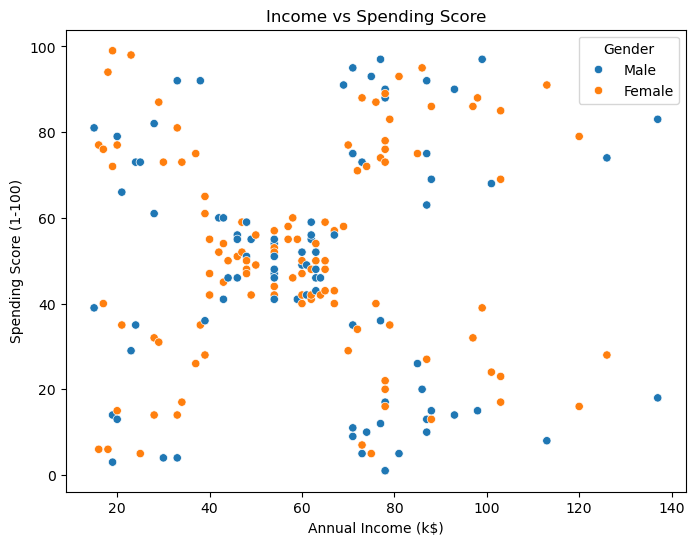

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Gender')
plt.title("Income vs Spending Score")
plt.show()


In [12]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


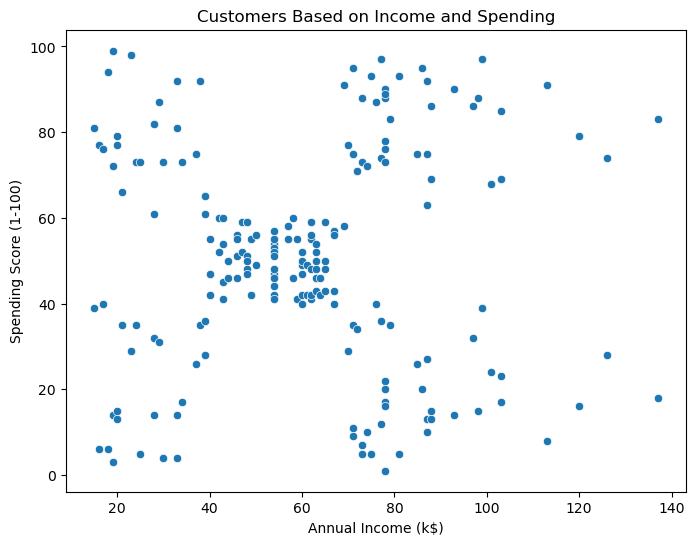

In [13]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Customers Based on Income and Spending")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
wcss = []  # list to store Within-Cluster Sum of Squares

for i in range(1, 11):  # try K from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

In [16]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

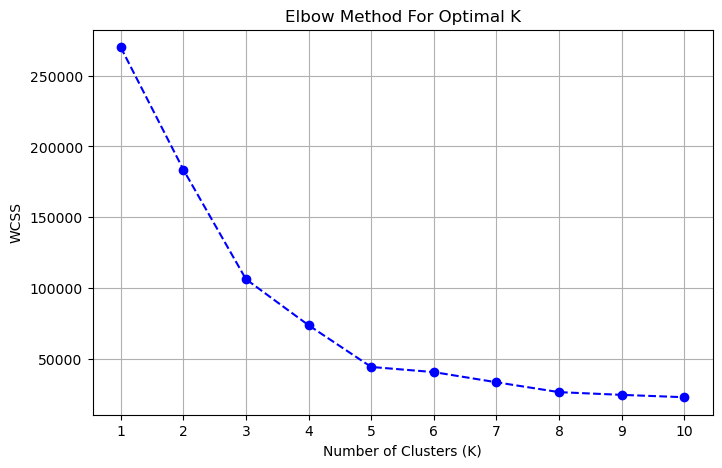

In [17]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [18]:
# Apply KMeans with the optimal number of clusters (K=5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Fit the model and predict the clusters
y_kmeans = kmeans.fit_predict(X)

# Show first 10 predictions
print("Cluster numbers for first 10 customers:", y_kmeans[:10])


Cluster numbers for first 10 customers: [4 2 4 2 4 2 4 2 4 2]


C:\Users\Adarsh School\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
# Add predicted cluster numbers to the original DataFrame
df['Cluster'] = y_kmeans

# See the updated table
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [21]:
df['Cluster'].value_counts()


Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

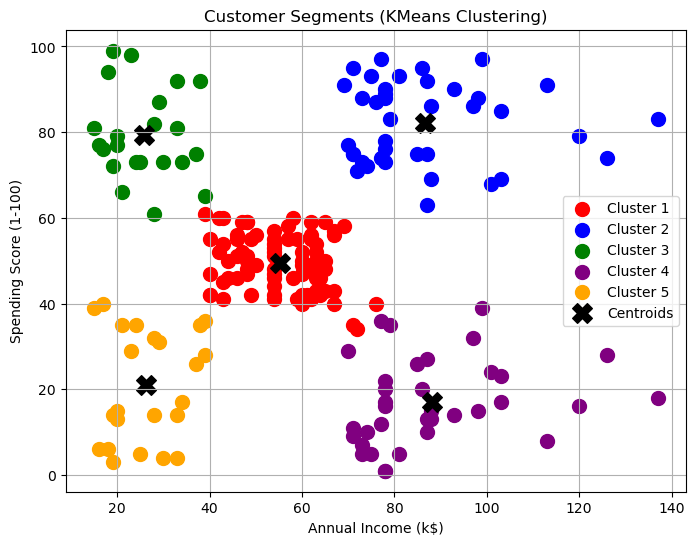

In [23]:
# First, convert the selected columns to NumPy array
X_values = X.values

# Set plot size
plt.figure(figsize=(8, 6))

# Plot each cluster
plt.scatter(X_values[y_kmeans == 0, 0], X_values[y_kmeans == 0, 1], 
            s=100, c='red', label='Cluster 1')

plt.scatter(X_values[y_kmeans == 1, 0], X_values[y_kmeans == 1, 1], 
            s=100, c='blue', label='Cluster 2')

plt.scatter(X_values[y_kmeans == 2, 0], X_values[y_kmeans == 2, 1], 
            s=100, c='green', label='Cluster 3')

plt.scatter(X_values[y_kmeans == 3, 0], X_values[y_kmeans == 3, 1], 
            s=100, c='purple', label='Cluster 4')

plt.scatter(X_values[y_kmeans == 4, 0], X_values[y_kmeans == 4, 1], 
            s=100, c='orange', label='Cluster 5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

# Add labels and title
plt.title("Customer Segments (KMeans Clustering)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Check average values in each cluster
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [25]:
# Save to a new CSV file
df.to_csv("Customer_Segmentation_With_Clusters.csv", index=False)

print("File saved successfully!")


File saved successfully!
